In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 🌟 **Welcome to Lesson 05: Visualizing Convolutions!** 🌟

In this special lesson, we're not diving into theory or heavy coding. Instead, we're going to **visualize** the magic behind convolutions! 🖼️✨

Understanding convolutions is crucial for anyone working with Convolutional Neural Networks (CNNs). Today, we'll explore how convolutions work and see their effects on images in real time.

## 🔍 **What Will We Do?**

We'll take an image and a convolutional filter to it. You'll see firsthand how each filter highlights different aspects of the image, such as edges, textures, and patterns.

Let's dive in and start exploring the fascinating world of convolutions! 🚀🖥️



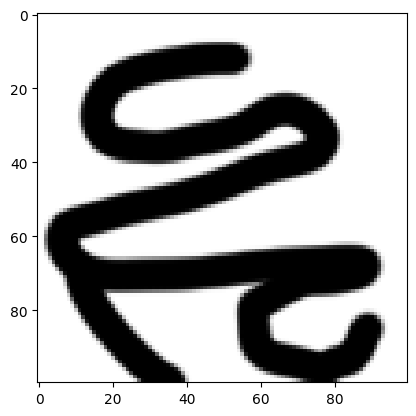

In [5]:
squiggle00 = Image.open('./../data/squiggles/squiggle00.png').convert('L')
squiggle00

squiggle00 = np.asarray(squiggle00).copy()
squiggle00.setflags(write=True)
plt.imshow(squiggle00, cmap='grey');

## 🔧 **Setting the Kernel** 🛠️

To start our convolution visualization, let's define our convolution kernel. A kernel (or filter) is a small matrix used to apply effects such as blurring, sharpening, and edge detection to images. The kernel we'll use for this lesson is designed to highlight vertical edges in the image. 📏📸

### 📝 **Kernel Definition**

We'll define a 3x3 kernel as follows:

```python
    [ 0.25,  0.  , -0.25]
    [ 0.25,  0.  , -0.25]
    [ 0.25,  0.  , -0.25]
```

This kernel will help us identify vertical lines in our image by emphasizing the difference between the left and right parts of the image. Let's apply this kernel to our image and see the magic unfold! ✨



In [6]:
ker = np.array(([0.25,0,-.25],[0.25,0,-.25],[.25,0,-.25]))
ker

array([[ 0.25,  0.  , -0.25],
       [ 0.25,  0.  , -0.25],
       [ 0.25,  0.  , -0.25]])

In [7]:
def convolv_neg_to_zero(img, i, j, ker):
    conv = 0
    for m in range(ker.shape[0]):
        for k in range(ker.shape[1]):
            conv += ker[m][k] * img[i+m-ker.shape[0]//2][j+k-ker.shape[1]//2]

    if conv < 0:
        conv = 0
    return conv

In [8]:
def apply_conv(img, ker):
    pad = ker.shape[0]//2
    img = np.pad(img, ((pad, pad), (pad, pad)), mode='constant')

    res = np.zeros(((img.shape[0]-ker.shape[0]+1), (img.shape[1]-ker.shape[0]+1)))

    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i > ker.shape[0] and i < squiggle00.shape[0] - ker.shape[0] and j > ker.shape[1] and j < squiggle00.shape[1] - ker.shape[1]:
                res[i][j] = convolv_neg_to_zero(img, i, j, ker)
    
    return res

In [9]:
def maxpooling(img, stride, filter_size):
    res = np.zeros(((img.shape[0]-filter_size+1)//stride, (img.shape[1]-filter_size+1)//stride))

    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            h_start = i * stride
            h_end = h_start + filter_size
            w_start = j * stride
            w_end = w_start + filter_size
            
            pool = img[h_start:h_end, w_start:w_end]
            res[i, j] = np.max(pool)

    return res

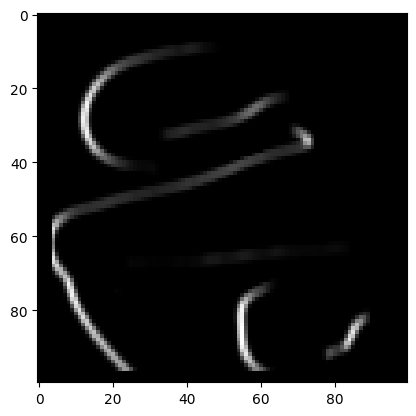

In [10]:
squiggle00_cov = apply_conv(squiggle00, ker)
plt.imshow(squiggle00_cov, cmap='grey')


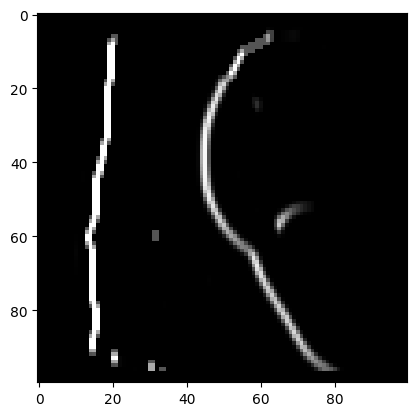

In [11]:
squiggle01 = Image.open('./../data/squiggles/squiggle01.png').convert('L')
squiggle01

squiggle01 = np.asarray(squiggle01).copy()
squiggle01.setflags(write=True)
plt.imshow(squiggle01, cmap='grey')

squiggle01_cov = apply_conv(squiggle01, ker)
plt.imshow(squiggle01_cov, cmap='grey')


## 🌊 **Applying Max Pooling** 🌊

Max pooling is a down-sampling operation typically used in convolutional neural networks (CNNs) to reduce the dimensionality of an image while retaining the most important features. This helps in reducing computational load and avoiding overfitting. Also helps the network be in variations to small changes in the input. 📉🔍

### 📝 **Max Pooling Operation**

We'll apply a 5x5 max pooling operation to our image. This means that for every 5x5 block of pixels, we'll take the maximum value


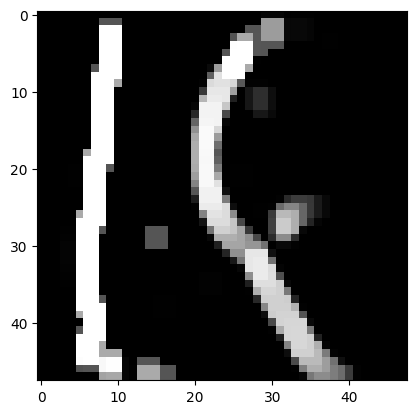

In [12]:
squiggle01_pooled = maxpooling(squiggle01_cov, 2, 5)
plt.imshow(squiggle01_pooled, cmap='grey')

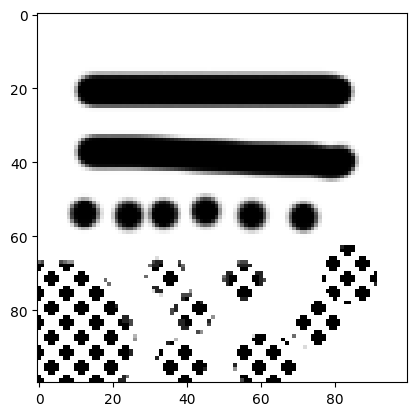

In [13]:
squiggle04 = Image.open('./../data/squiggles/squiggle02.png').convert('L')

squiggle04 = np.asarray(squiggle04).copy()
squiggle04.setflags(write=True)
plt.imshow(squiggle04, cmap='grey')

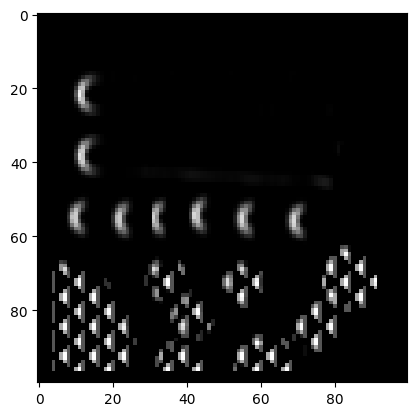

In [14]:
squiggle04_cov = apply_conv(squiggle04, ker)
plt.imshow(squiggle04_cov, cmap='grey')

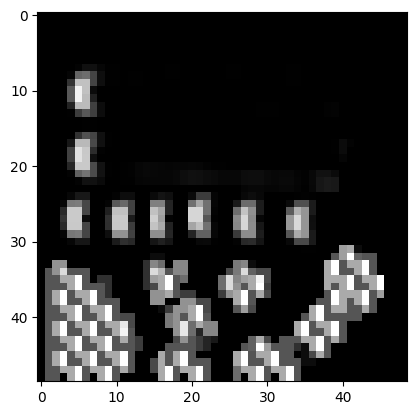

In [15]:
squiggle04_pooled = maxpooling(squiggle04_cov, 2, 3)
plt.imshow(squiggle04_pooled, cmap='grey')

## 🔍 **Kernel Visualization** 🔍

Here we will visualize the kernel as it slides across the image. 🌐✨

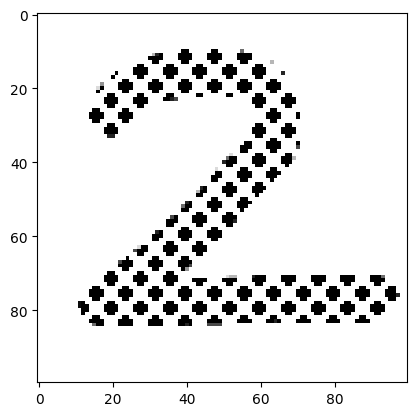

In [16]:
squiggle03 = Image.open('./../data/squiggles/squiggle03.png').convert('L')

squiggle03 = np.asarray(squiggle03).copy()
squiggle03.setflags(write=True)
plt.imshow(squiggle03, cmap='grey');

In [17]:
def viz_kerna_size(i,j, img, save_name, ker):
    for m in range(ker.shape[0]):
        for k in range(ker.shape[1]):
            img[m+i-(ker.shape[0]//2)][k+j-(ker.shape[0]//2)] = 150


    plt.imshow(img, cmap='gray') 
    plt.savefig(f'./{save_name}_augmented.png')




def apply_conv_with_viz(img, ker, saved_name):
    pad = ker.shape[0]//2
    img = np.pad(img, ((pad, pad), (pad, pad)), mode='constant')

    res = img.copy()

    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i > ker.shape[0] and i < squiggle00.shape[0] - ker.shape[0] and j > ker.shape[1] and j < squiggle00.shape[1] - ker.shape[1]:
                if i%2 and j%10 == 0:
                    viz_kerna_size(i,j,res.copy(),saved_name,ker)
                res[i][j] = convolv_neg_to_zero(img, i, j,ker)
    
    return res

KeyboardInterrupt: 

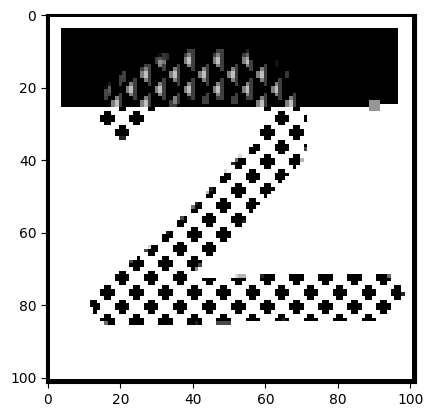

In [18]:
apply_conv_with_viz(squiggle03, ker, 'squiggle03_augmented')